DNN: torch.nn 모듈 이용

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

PyTorch(딥러닝), numpy(수치계산), matplotlib(시각화) 라이브러리를 불러오기.

In [3]:
torch.manual_seed(1)

linear_layer1 = nn.Linear(2,3)
relu = nn.ReLU()
linear_layer2 = nn.Linear(3,1)

x = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])
print('linear_layer1.weight :', linear_layer1.weight)
print('linear_layer1.bias :', linear_layer1.bias)
print()
print('linear_layer2.weight :', linear_layer2.weight)
print('linear_layer2.bias :', linear_layer2.bias)

out = linear_layer1(x)
out = relu(out)
y_pred = linear_layer2(out)
print()
print(y_pred)

linear_layer1.weight : Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)
linear_layer1.bias : Parameter containing:
tensor([-0.1455,  0.3597,  0.0983], requires_grad=True)

linear_layer2.weight : Parameter containing:
tensor([[-0.0707,  0.1601,  0.0285]], requires_grad=True)
linear_layer2.bias : Parameter containing:
tensor([0.2109], requires_grad=True)

tensor([[0.3608],
        [0.4152],
        [0.4776]], grad_fn=<AddmmBackward0>)


[기본 신경망 레이어 실습]

랜덤 시드 고정: 실행마다 동일한 결과 보장

2차원 입력 → 3차원 은닉층 → ReLU → 1차원 출력의 간단한 신경망을 실습.

linear_layer1.weight: 랜덤 생성된 (3,2) 텐서
linear_layer1.bias: 랜덤 생성된 (3,) 텐서
linear_layer2.weight:랜덤 생성된 (1,3) 텐서
linear_layer2.bias: 랜덤 생성된 (1,) 텐서

1. 첫 번째 선형층
   X*W_T : 행렬 곱 연산으로 인해 (3,3) 텐서 생성
   X*W_T+b : (3,3) 텐서에 (3,)의 b가 브로드캐스팅 되어 그대로 (3,3) 텐서 생성

2. ReLu 활성화 : 음수 값은 0으로 바뀜.

3. 두 번째 선형층
   ReLU(X*W+b)*W2 : 행렬 곱 연산으로 인해 (3,1) 텐서 생성
   ReLU(X*W+b)*W2+b2 : (3,1) 텐서에 (1,)의 b가 브로드캐스팅 되어 그대로 (3,1) 텐서 생성
   

(3*2) 텐서 x에 대해 forward 연산 결과를 출력.

nn.Sequential 함수 사용

In [6]:
torch.manual_seed(1)

model = nn.Sequential(
    nn.Linear(2,3),
    nn.ReLU(),
    nn.Linear(3,1)
)

print(model)

x = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])
print('linear_layer1.weight :', model[0].weight)
print('linear_layer1.bias :', model[0].bias)
print()
print('linear_layer2.weight :', model[2].weight)
print('linear_layer2.bias :', model[2].bias)
print()
y_pred = model(x)
print(y_pred)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)
linear_layer1.weight : Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)
linear_layer1.bias : Parameter containing:
tensor([-0.1455,  0.3597,  0.0983], requires_grad=True)

linear_layer2.weight : Parameter containing:
tensor([[-0.0707,  0.1601,  0.0285]], requires_grad=True)
linear_layer2.bias : Parameter containing:
tensor([0.2109], requires_grad=True)

tensor([[0.3608],
        [0.4152],
        [0.4776]], grad_fn=<AddmmBackward0>)



랜덤 시드 고정: 실행마다 동일한 결과 보장

nn.Sequential()을 사용해 모델 객체 생성.

불필요한 변수 선언 방지하여 위와 동일한 신경망을 더 간결하게 정의.

2차원 입력 → 3차원 은닉층 → ReLU → 1차원 출력의 간단한 신경망을 실습.

linear_layer1.weight: 랜덤 생성된 (3,2) 텐서
linear_layer1.bias: 랜덤 생성된 (3,) 텐서
linear_layer2.weight:랜덤 생성된 (1,3) 텐서
linear_layer2.bias: 랜덤 생성된 (1,) 텐서

1. 첫 번째 선형층
   X*W_T : 행렬 곱 연산으로 인해 (3,3) 텐서 생성
   X*W_T+b : (3,3) 텐서에 (3,)의 b가 브로드캐스팅 되어 그대로 (3,3) 텐서 생성

2. ReLu 활성화 : 음수 값은 0으로 바뀜.

3. 두 번째 선형층
   ReLU(X*W+b)*W2 : 행렬 곱 연산으로 인해 (3,1) 텐서 생성
   ReLU(X*W+b)*W2+b2 : (3,1) 텐서에 (1,)의 b가 브로드캐스팅 되어 그대로 (3,1) 텐서 생성
   

(3*2) 텐서 x에 대해 forward 연산 결과를 출력.

nn.Module 상속한 클래스 이용

In [9]:
torch.manual_seed(1)

class MyModel(nn.Module):

  def __init__(self):
    super(MyModel, self).__init__()
    self.fc1 = nn.Linear(2,3)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(3,1)
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
  
x = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])
model = MyModel()
print(model)
print('linear_layer1.weight :',model.fc1.weight)
print('linear_layer1.bias :', model.fc1.bias)
print()
print('linear_layer2.weight :', model.fc2.weight)
print('linear_layer2.bias :', model.fc2.bias)
print()
y_pred = model(x)
print(y_pred)

MyModel(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)
linear_layer1.weight : Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)
linear_layer1.bias : Parameter containing:
tensor([-0.1455,  0.3597,  0.0983], requires_grad=True)

linear_layer2.weight : Parameter containing:
tensor([[-0.0707,  0.1601,  0.0285]], requires_grad=True)
linear_layer2.bias : Parameter containing:
tensor([0.2109], requires_grad=True)

tensor([[0.3608],
        [0.4152],
        [0.4776]], grad_fn=<AddmmBackward0>)



1. 랜덤 시드 고정: 실행마다 동일한 결과 보장
torch.manual_seed(1)

2. 사용자 정의 모델 클래스 정의 시작
class MyModel(nn.Module):


- PyTorch의 nn.Module을 상속받아 신경망 모델 클래스 정의.
- nn.Module 기능(레이어 등록, 파라미터 관리, to(), eval() 등)을 물려받아, PyTorch 신경망 모델로 동작할 수 있게 함.

3. 생성자(__init__) 정의
 def __init__(self):
    super(MyModel, self).__init__()
    self.fc1 = nn.Linear(2,3)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(3,1)

    - super(MyModel, self).__init__(): 부모 클래스 생성자 호출
    - self.fc1 = nn.Linear(2,3) : 입력 2차원 -> 출력 3차원의 완전 연결층 정의.
    - self.relu = nn.ReLU() : 활성화 함수로 RELU 사용
    - self.fc2 = nn.Linear(3,1) : 입력 3차원 -> 출력 1차원의 완전 연결층 정의.

4. 순전파(forward) 메서드 정의
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

   - out = self.fc1(x): 입력 x를 첫 번째 선형층(fc1)에 통과.
   - out = self.relu(out): ReLU 활성화 함수를 적용(음수 → 0).
   - out = self.fc2(out): ReLU 출력을 두 번째 선형층(fc2)에 통과.
   - return out : 최종 출력을 반환

5. 입력 데이터 생성 #(3,2) 텐서
x = torch.tensor([[1.,2.],[3.,4.],[5.,6.]])

6. 모델 인스턴스 생성
model = MyModel()

7. 모델 구조 출력
print(model)
   

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("학습을 진행하는 기기: ", device)

import pandas as pd
boston = pd.read_csv('Boston_Housing.csv')
print(boston.info())

학습을 진행하는 기기:  cpu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("학습을 진행하는 기기: ", device)

- torch.cuda.is_available()이 True이면 GPU(=cuda), 아니면 CPU를 사용합니다.
- 학습 및 연산을 어느 하드웨어에서 진행할지 결정하고, 그 결과를 출력합니다.

import pandas as pd
boston = pd.read_csv('Boston_Housing.csv')
print(boston.info())

- import pandas as pd: 데이터 분석 라이브러리 pandas를 불러옵니다.
- boston = pd.read_csv('Boston_Housing.csv'): 현재 폴더에 있는 Boston_Housing.csv 파일을 읽어와 DataFrame(표 형태 데이터)으로 저장합니다.
- print(boston.info()): 데이터프레임의 전체 정보(컬럼명, 데이터 타입, 결측치 여부, 행 개수 등)를 출력합니다.

In [13]:
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


pandas DataFrame인 boston의 상위 5개 행(샘플) 출력

In [15]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Boston_Housing.csv 데이터프레임에서 각 열별로 결측치(null,NaN)의 개수 계산

In [17]:
# Convert from Pandas dataframe to numpy arrays
X = boston.drop(labels =['medv'], axis = 1).values
y = boston[['medv']].values
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506, 1)


X = boston.drop(labels =['medv'], axis = 1).values
- .drop(labels=['medv'], axis=1): 'medv' 열 삭제
- .values: DataFrame을 numpy 배열로 변환

y = boston[['medv']].values
- 'medv'열만 선택해 numpy 배열로 변환
- [['medv']]로 열 벡터 형태 유지

X,y type, shape 출력


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.preprocessing import StandardScaler
- scikit-learn의 데이터 전처리 도구인 StandardScaler를 불러옴.

scaler = StandardScaler()
- StandardScaler 객체 생성

scaler.fit(X)
- X(입력 데이터)의 각 특성별 평균과 표준편차 계산해 scaler 객체에 저장.

X_scaled = scaler.transform(X)
- X의 각 특성에서 평균 빼고, 표준 편차로 나눠 표준정규분포 평균 0, 표준편차 1 되도록 표준화.
- 결과는 X와 같은 shape의 numpy 배열(X_scaled)로 저장.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(354, 13) (354, 1) (152, 13) (152, 1)


from sklearn.model_selection import train_test_split
- scikit-learn의 데이터 분할 함수 train_test_split을 불러옴.
데이터를 랜덤하게 섞어서 학습용/테스트용으로 나누는 데 사용.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

- X_scaled(입력 데이터)와 y(타겟)를 각각 학습용과 테스트용으로 나누기.

- test_size=0.3: 전체 데이터의 30%는 테스트셋, 70%는 학습셋이 됩니다.

- random_state=1: 분할을 매번 동일하게(재현 가능하게) 하도록 난수 시드를 고정.

결과적으로 4개의 배열이 생성:

- X_train: 학습 입력 데이터

- X_test: 테스트 입력 데이터

- y_train: 학습 타겟 데이터

- y_test: 테스트 타겟 데이터

In [23]:
#데이터 텐서화
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim

torch: 텐서 생성, 연산, GPU 사용 등 PyTorch의 기본 기능 제공
torch.nn: 레이어, 손실함수, 신경망 모델 정의 등에 사용. 신경망 관련 모듈 nn으로 불러오기.
torch.nn.functional: 신경망에서 자주 쓰는 함수(활성화 함수, 손실 함수)를 F라는 이름으로 불러오기.
Ex) F.relu(), F.cross_entropy()
from torch import nn, optim : torch 패키지에서 nn(신경망 모듈)과 optim(최적화 알고리즘 모듈) 직접 불러오기.

*optim : 모델 학습 시 파라미터 업데이트(Adam, SGD 등)에 사용

In [25]:
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, device = device, dtype = torch.float)
X_test = torch.tensor(X_test, device = device, dtype = torch.float)
y_train = torch.tensor(y_train, device = device, dtype = torch.float)
y_test = torch.tensor(y_test, device = device, dtype = torch.float)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([354, 13]) torch.Size([354, 1]) torch.Size([152, 13]) torch.Size([152, 1])


n_train = X_train.shape[0]
- 학습 데이터의 샘플 수(행 개수)를 n_train에 저장.

X_train = torch.tensor(X_train, device = device, dtype = torch.float)
X_test = torch.tensor(X_test, device = device, dtype = torch.float)
y_train = torch.tensor(y_train, device = device, dtype = torch.float)
y_test = torch.tensor(y_test, device = device, dtype = torch.float)

- numpy 배열 형태의 입력/타겟 데이터를 PyTorch의 텐서로 변환.

- device=device로 지정하면, GPU(cuda) 또는 CPU 중 사용 가능한 곳에 데이터를 올린다.

- dtype=torch.float로 실수형(float32) 텐서로 변환.

- 각 데이터셋 크기 확인.

- 신경망 학습에 사용할 수 있는 형태로 준비하는 단계.

In [27]:
class BostonDataset(torch.utils.data.Dataset):
  '''
  Prepare the Boston dataset for regression
  '''

  def __init__(self, X, y):
    self.X = X
    self.y = y
  
  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    x = self.X[index]
    y = self.y[index]
    return x, y

[사용자 정의 데이터셋 클래스]

class BostonDataset(torch.utils.data.Dataset):
  '''
  Prepare the Boston dataset for regression
  '''

- torch.utils.data.Dataset을 상속받아 사용자 정의 데이터셋 클래스를 만듦.
- PyTorch의 DataLoader와 함께 사용되어, 배치 단위로 데이터를 쉽게 불러올 수 있게 해줌.

def __init__(self, X, y):
    self.X = X
    self.y = y

- 생성자 메서드
- 입력 데이터(X)와 타겟 데이터(y)를 받아 객체 내부에 저장.
- X,y는 이미 텐서화된 데이터.

def __len__(self):
    return len(self.X)

- 데이터셋의 전체 샘플 개수를 반환.
- DataLoader가 배치 단위로 데이터 불러올 때, 전체 데이터 크기를 파악하려고 사용.

def __getitem__(self, index):
    x = self.X[index]
    y = self.y[index]
    return x, y 

- 인덱스를 입력으로 받아, 해당 인덱스의 입력(x)과 타겟(y)를 한 쌍으로 반환.
- DataLoader가 미니배치 구성 시 이 메서드를 반복적으로 호출.
- 반환값은 (x,y) 튜플이며, 각각 하나의 샘플이다.

In [29]:
dataset = BostonDataset(X_train, y_train)
print(len(dataset))
print(dataset[0])

354
(tensor([-0.3472, -0.4877, -0.4373, -0.2726, -0.1442, -0.4782, -0.2409,  0.4338,
        -0.6380, -0.6013,  1.1765,  0.4411, -0.6158]), tensor([20.4000]))


dataset = BostonDataset(X_train, y_train)
 - X_train, y_train 텐서를 받아 BostonDataset 객체 생성

print(len(dataset))
 - 데이터셋에 포함된 샘플 개수(행 개수) 출력

print(dataset[0])
 - 데이터셋의 첫 번째 샘플 출력
 - X : 354*13 y : 354*1 크기였으므로 0번째 데이터셋은 해당 결과로 출력. 

In [31]:
torch.manual_seed(0)
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 16, shuffle=True)

torch.manual_seed(0)
 - 실행 시마다 동일한 결과.

trainloader = torch.utils.data.DataLoader(dataset, batch_size = 16, shuffle=True)
 - dataset(BostonDataset 객체)을 DataLoader에 넣어 학습 데이터 공급자 만들기.
 - batch_size = 16: 한 번에 16개 샘플씩 미니배치로 불러오기.
 - shuffle=True: 에폭마다 데이터 랜덤하게 섞어 배치 생성.
   

In [33]:
class BostonModel(nn.Module):
  def __init__(self):
    super(BostonModel,self).__init__() # 모델 연산 정의
    self.fc1 = nn.Linear(X_train.shape[1],32)
    self.fc2 = nn.Linear(32, 16)
    self.fc3 = nn.Linear(16, 8)
    self.fc4 = nn.Linear(8,1)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    # Linear 계산 후 활성화 함수 ReLU를 적용한다.
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

model = BostonModel().to(device)

class BostonModel(nn.Module):
 - nn.Module을 상속받아 새로운 모델 클래스를 정의

def __init__(self):
    super(BostonModel,self).__init__() # 부모 클래스 초기화 메서드 호출
    self.fc1 = nn.Linear(X_train.shape[1],32) # 입력 차원 -> 32차원 변환하는 완전 연결층
    self.fc2 = nn.Linear(32, 16) # 32차원 -> 16차원
    self.fc3 = nn.Linear(16, 8) # 16차원 -> 8차원
    self.fc4 = nn.Linear(8,1) # 8차원 -> 1차원

def forward(self,x): # 입력 데이터가 모델을 통과할 때의 연산 과정을 정의
    x = F.relu(self.fc1(x))
    # Linear 계산 후 활성화 함수 ReLU를 적용한다. -> 비선형성 부여
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x) # 회귀 문제이므로 마지막 출력층은 활성화 x.
    return x

model = BostonModel().to(device)
 - BostonModel의 인스턴스 model 생성.
 - .to(device)는 모델의 파라미터와 연산을 GPU(cuda) 또는 CPU 중 사용 가능한 곳에 올림.
 - 이후 학습 및 예측을 이 모델로 진행합니다.




In [35]:
# Define the Loss function and optimizer
learning_rate = 0.0001
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

learning_rate = 0.0001
 - 학습률 0.0001로 설정.
 - 값이 너무 크면 발산, 너무 작으면 학습이 느려짐.
   
loss_function = nn.MSELoss()
 - 손실 함수로 평균제곱오차를 사용.
 - 회귀 문제에서 가장 널리 쓰이는 손실 함수.
 - 예측값과 실제값의 차이를 제곱해 평균 내는 원리, 오차와 손실이 정비례.
   
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
 - 옵티마이저로 Adam사용
 - model.parameters()는 모델의 학습 가능한 모든 파라미터(가중치, 편향 등)를 옵티마이저에 전달.
 - lr = learning_rate로 학습률 지정.
 - Adam은 학습률 자동 조정하며, SGD보다 빠르고 안정적으로 수렴한다.

In [37]:
num_epochs = 1000
epoch_losses = []
for epoch in range(num_epochs):
  running_loss = 0.0
  for inputs, labels in trainloader:
    #forward pass
    outputs = model(inputs)
    #loss
    loss = loss_function(outputs, labels)
    #backward pass
    #computing gradients
    loss.backward()
    #파라미터 업데이트
    #updated weights based on computed gradients
    optimizer.step()
    #다음 iters의 loss.backward()에서 gradient를 새로 계산하므로 grad 0으로 초기화
    optimizer.zero_grad()

    #accumulating running loss
    running_loss += loss.item()

  epoch_losses.append(running_loss)
  if (epoch ==0):
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))
  if (epoch+1) % 100 ==0:
     print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))

Epoch 1/1000 loss : 13536.157
Epoch 100/1000 loss : 1405.347
Epoch 200/1000 loss : 561.298
Epoch 300/1000 loss : 424.953
Epoch 400/1000 loss : 354.203
Epoch 500/1000 loss : 302.831
Epoch 600/1000 loss : 265.337
Epoch 700/1000 loss : 243.908
Epoch 800/1000 loss : 230.717
Epoch 900/1000 loss : 221.995
Epoch 1000/1000 loss : 204.557


num_epochs: 전체 학습 반복 횟수를 1000으로 설정.
poch_losses: 각 epoch의 손실을 저장할 리스트를 초기화.

1. 에폭 시작

for epoch in range(num_epochs):
    running_loss = 0.0
 - 총 1000번의 에폭
 - running_loss: 현재 에포크의 누적 손실을 0으로 초기화합니다.

2. 미니배치 반복

for inputs, labels in trainloader:

 - trainloader에서 미니배치(16개 샘플)를 하나씩 불러옴.

3. 순전파

outputs = model(inputs)

 - 모델에 입력 데이터(inputs)를 전달해 예측값(outputs) 계산.

4. 손실 계산

loss = loss_function(outputs, labels)

 - 예측값(outputs)과 실제값(labels) 사이의 평균제곱오차 계산.

5. 역전파

loss.backward()

 - 손실에 대한 각 파라미터의 기울기(gradient) 계산.


6. 파라미터 업데이트

optimizer.step()

 - 계산된 기울기 사용, Adam 옵티마이저로 모델 파라미터 업데이트.

7. 기울기 초기화

optimizer.zero_grad()

 - 다음 미니배치 계산 위해 기울기 0으로 초기화.

8. 누적 손실 계산

running_loss += loss.item()

 - 현재 미니배치의 손실을 running_loss에 누적.

9. 에폭 종료 후 처리

epoch_losses.append(running_loss)

 - 현재 에포크의 누적 손실을 epoch_losses 리스트에 저장.

10. 진행 상황 출력

if (epoch == 0):
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))
if (epoch + 1) % 100 == 0:
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))

 - 첫 번째 에포크와 100번째 에포크마다 손실을 출력.

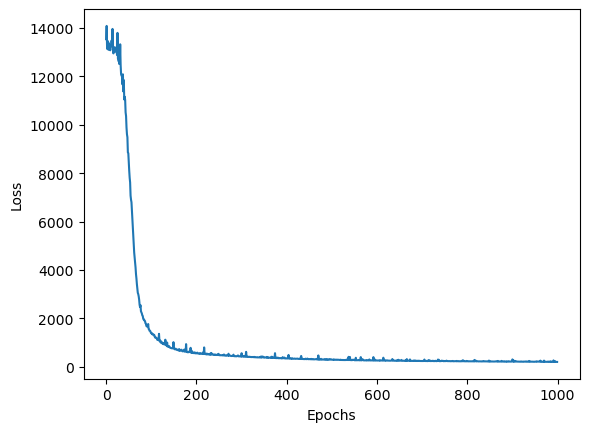

In [39]:
plt.plot(range(num_epochs), epoch_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(range(num_epochs), epoch_losses)
 - 학습이 진행되는 동안 기록된 손실 값을 선 그래프로 그림.
plt.xlabel('Epochs')
 - x축에 에폭 수 표시.
plt.ylabel('Loss')
 - y축에 손실 값 표시.
plt.show()
 - 그래프 출력.

In [41]:
#모델 성능평가

from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model(X_test)
print('y_test_pred.requires_grad= ', y_test_pred.requires_grad)
print('y_test.requires_grad= ', y_test.requires_grad)
mse = mean_squared_error(y_test_pred.detach().cpu().numpy(), y_test.detach().cpu().numpy())
print('MSE: {:.4f}'.format(mse))
R2 = r2_score(y_test_pred.detach().cpu().numpy(), y_test.detach().cpu().numpy())
print( 'R2: {:.4f}'.format(R2))

y_test_pred.requires_grad=  True
y_test.requires_grad=  False
MSE: 8.0012
R2: 0.8977


#모델 성능평가

from sklearn.metrics import mean_squared_error, r2_score
 - scikit-learn 라이브러리에서 회귀 모델 평가에 사용되는 두 가지 핵심 지표(MSE,R^2) 불러옴.

y_test_pred = model(X_test)
 - 테스트 데이터에 대한 모델의 테스트 예측값 구하기.
 - 이 예측값은 학습에 사용되지 않은 데이터에 대한 결과로, 모델의 일반화 성능을 평가하는 데에 중요.
print('y_test_pred.requires_grad= ', y_test_pred.requires_grad)
print('y_test.requires_grad= ', y_test.requires_grad)
 - 예측값과 실제값 텐서에 대해 기울기 계산이 필요한지 여부 출력.
 - requires_grad=True면 텐서가 학습 중이라 기울기 계산이 필요함을 의미.
 - y_test_pred는 모델 학습에서 비롯된 예측이므로, requires_grad는 true
 - y_test는 정답 데이터이므로, requires_grad는 false

mse = mean_squared_error(y_test_pred.detach().cpu().numpy(), y_test.detach().cpu().numpy())
print('MSE: {:.4f}'.format(mse))

 - .detach()없이 requires_grad=True인 cpu 텐서를 호출 시 아래와 같은 런타임 에러 발생.
   RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
   <평균제곱오차>
 - 예측값과 실제값의 **차이(오차)**를 제곱해서 평균낸 값.
 - 오차가 클수록 값이 커짐. (오차를 제곱하므로 큰 오차에 더 큰 패널티)
 - 4번째 자리까지 출력.


R2 = r2_score(y_test_pred.detach().cpu().numpy(), y_test.detach().cpu().numpy())
print( 'R2: {:.4f}'.format(R2))

 - .detach()없이 requires_grad=True인 cpu 텐서를 호출 시 아래와 같은 런타임 에러 발생.
   RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
   <결정계수>
  - 전체 변동성(실제값의 분산) 중에서 모델이 설명하는 비율.
  - 1에 가까울수록 모델이 실제값을 잘 설명.
  - 0이 모델이 평균값만큼도 못 맞춘다는 뜻
  - 음수: 모델이 아예 엉뚱하게 맞춘 경우 (평균으로 예측하는 것보다 못함)
 - 4번째 자리까지 출력.

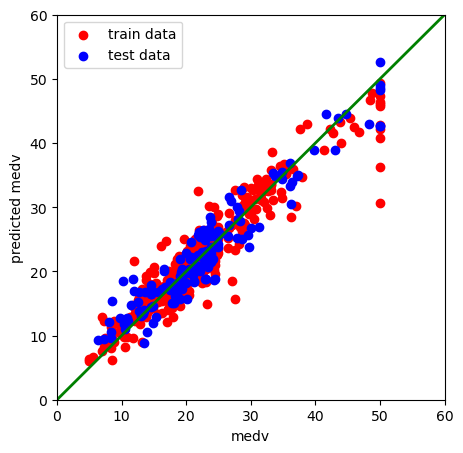

In [43]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

plt.figure(figsize=(5,5), dpi=100)
plt.xlabel("medv")
plt.ylabel("predicted medv")
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.scatter(y_train, y_train_pred, lw=1, color = 'r', label = 'train data')
plt.scatter(y_test, y_test_pred, lw=1, color = 'b', label = 'test data')
plt.plot([0,60],[0,60],color = 'green', lw=2, linestyle='solid')
plt.legend()
plt.show()

y_train_pred = model(X_train)
y_test_pred = model(X_test)
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
 
- .detach()없이 requires_grad=True인 cpu 텐서를 호출 시 아래와 같은 런타임 에러 발생.
   RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.


plt.figure(figsize=(5,5), dpi=100)
그래프의 크기를 5x5인치, 해상도를 100dpi로 설정.

plt.xlabel("medv")
x축 라벨을 "medv"로 지정.
→ 실제 주택가격 의미(천달러 단위)

plt.ylabel("predicted medv")
y축 라벨을 "predicted medv"로 지정.
→ 모델이 예측한 주택가격을 의미(천달러 단위)

plt.xlim(0, 60)
x축의 값 범위를 0~60으로 제한.
→ 실제 주택가격의 값이 0~60 사이에 분포하므로, 그래프가 보기 좋게 조정.

plt.ylim(0, 60)
y축의 값 범위를 0~60으로 제한.
→ 예측값도 같은 범위로 맞춰, 실제값과 예측값을 1:1로 비교 가능.

plt.scatter(y_train, y_train_pred, lw=1, color = 'r', label = 'train data')
학습 데이터의 실제값(y_train)과 예측값(y_train_pred)을 빨간 점으로 산점도에 표시.
label이 'train data'이므로 범례에 "train data"로 나타남.

plt.scatter(y_test, y_test_pred, lw=1, color = 'b', label = 'test data')
테스트 데이터의 실제값(y_test)과 예측값(y_test_pred)을 파란 점으로 산점도에 표시.
label이 'test data'이므로 범례에 "test data"로 나타남.

plt.plot([0,color='green', lw=2, linestyle='solid')
x축과 y축이 같은 값을 가질 때의 직선, 즉 y=x 기준선을 초록색 실선으로 그림.
이 선은 "예측값 = 실제값"인 완벽한 예측을 의미.


예제 4.2 당뇨병 발병 유무 분류

In [46]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('학습을 진행하는 기기: ', device)

diabetes = pd.read_csv('pima-indians-diabetes.csv')
print(diabetes.info())
print(diabetes.head())

학습을 진행하는 기기:  cpu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
만약 CUDA(즉, GPU)가 사용 가능하면 'cuda'를, 아니면 'cpu'를 선택.

print('학습을 진행하는 기기: ', device)
실제 학습이 진행될 기기를 출력합니다.

diabetes = pd.read_csv('pima-indians-diabetes.csv')
Pima Indians Diabetes 데이터셋을 pandas DataFrame으로 불러옴.

print(diabetes.info())
데이터프레임의 전체 구조(행/열 수, 각 컬럼별 결측치, 데이터 타입 등)를 출력

print(diabetes.head())
데이터의 앞부분 5개 행을 출력


In [48]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pandas DataFrame인 diabetes의 각 열(컬럼)마다 결측치(null, NaN)의 개수

In [50]:
# Convert from Pandas dataframe to numpy arrays
X = diabetes.drop(labels = ['Outcome'], axis = 1).values
y = diabetes[['Outcome']].values

print(type(X))
print(type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(768, 8) (768, 1)


X = diabetes.drop(labels = ['Outcome'], axis = 1).values
diabetes 데이터프레임에서 'Outcome' 컬럼(즉, 정답 레이블)만 제외하고, 나머지 8개 특징(입력 변수)만 추출.

.values를 붙이면 pandas DataFrame이 numpy 배열(ndarray)로 변환.

결과: X는 (768, 8) 크기의 numpy 배열.

y = diabetes[['Outcome']].values
'Outcome' 컬럼(정답, 0 또는 1)만 추출해서 numpy 배열로 변환.

결과: y는 (768, 1) 크기의 numpy 배열.

print(type(X))
print(type(y))
print(X.shape, y.shape)

X와 y의 자료형, 크기 출력.


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614, 1) (154, 1)


전체 데이터 X(입력), y(정답)를 **학습용(80%)**과 **테스트용(20%)**으로 무작위 분할.

random_state=0으로 무작위 분할의 결과를 항상 동일하게.(재현성 확보)

각 데이터셋의 크기(행, 열)를 출력.


In [54]:
#Creating Tensors
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([614, 8]) torch.Size([154, 8]) torch.Size([614, 1]) torch.Size([154, 1])


torch.FloatTensor(...) : 넘파이 배열을 32비트 실수형(float) 텐서로 변환.
.to(device) : 텐서를 GPU(사용 가능하면) 또는 CPU로 옮기.
torch.LongTensor(...) : 넘파이 배열을 64비트 정수형(long) 텐서로 변환.

In [56]:
dataset = torch.utils.data.TensorDataset(X_train,y_train)

TensorDataset은 여러 개의 텐서를 같은 인덱스끼리 묶어서 하나의 데이터셋 객체로 만들어줌.

보통 (입력, 정답) 쌍을 하나의 샘플로 다루기 위해 사용.

예를 들어, 첫 번째 샘플을 꺼내면 (X_train, y_train)이 반환.

In [58]:
torch.manual_seed(0)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

torch.manual_seed(0)
파이토치의 난수 생성 시드를 0으로 고정.
이를 통해 데이터 섞기(shuffle)마다 동일한 결과가 나오도록 보장(재현성 확보).

trainloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)
dataset을 미니배치 단위로 묶어주는 데이터로더 객체를 만듦.

batch_size=16 : 한 번에 16개 샘플씩 미니배치로 제공.

shuffle=True : 에포크마다 데이터를 무작위로 섞어서 모델이 데이터 순서에 의존하지 않도록.

In [60]:
#Creating the model
class Diabetes_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(X_train.shape[1], 20)
    self.fc2 = nn.Linear(20,10)
    self.fc3 = nn.Linear(10,2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
model = Diabetes_model().to(device)
print(model.parameters)

<bound method Module.parameters of Diabetes_model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=2, bias=True)
)>


class Diabetes_model(nn.Module): #PyTorch의 nn.Module을 상속받아 신경망 모델을 정의
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(X_train.shape[1], 20) # 첫 번째 완전연결층(fc1): 입력 특성 개수(8개) → 20개 노드
    self.fc2 = nn.Linear(20,10) # 두 번째 완전연결층(fc2): 20개 → 10개 노드
    self.fc3 = nn.Linear(10,2) # 세 번째 완전연결층(fc3): 10개 → 2개 노드 (이진 분류이므로 출력 2개)
    
  def forward(self, x):
    x = F.relu(self.fc1(x)) # 입력을 순서대로 fc1, fc2, fc3에 통과시키며, fc1과 fc2 뒤에는 ReLU 활성화 함수를 적용.
    x = F.relu(self.fc2(x)) # 입력을 순서대로 fc1, fc2, fc3에 통과시키며, fc1과 fc2 뒤에는 ReLU 활성화 함수를 적용.
    x = self.fc3(x) # 마지막 fc3은 활성화 함수 없이 그대로 출력(이후 CrossEntropyLoss 등에서 softmax 처리).
    return x
  
model = Diabetes_model().to(device) # 모델 객체를 생성하고, GPU가 있으면 GPU에, 없으면 CPU에 할당
print(model.parameters) # 모델의 학습 가능한 파라미터(가중치, 편향 등) 정보를 출력
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(X_train.shape[1], 20)
    self.fc2 = nn.Linear(20,10)
    self.fc3 = nn.Linear(10,2)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
model = Diabetes_model().to(device)
print(model.parameters)

In [62]:
# Define the loss function and optimizer
learning_rate = 0.0001
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

학습률(learning rate)을 0.0001로 설정.
분류 문제(특히 다중 클래스 분류)에서 손실 함수로 CrossEntropyLoss(교차 엔트로피 손실) 사용.
최적화 알고리즘으로 Adam 선택.
model.parameters()는 모델의 학습 가능한 파라미터(가중치, 편향 등)를 모두 전달.
lr=learning_rate로 학습률을 지정.


In [64]:
num_epochs = 2000
epoch_loss = []
for epoch in range(num_epochs):
  running_loss = 0.0
  for inputs, labels in trainloader:
    y_pred = model(inputs)
    loss = loss_function(y_pred, labels.view(-1))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()
  
  epoch_loss.append(running_loss)

  if(epoch==0):
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))
  if(epoch+1) % 100 ==0:
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))

Epoch 1/2000 loss : 102.391
Epoch 100/2000 loss : 22.760
Epoch 200/2000 loss : 21.899
Epoch 300/2000 loss : 21.102
Epoch 400/2000 loss : 20.683
Epoch 500/2000 loss : 20.409
Epoch 600/2000 loss : 19.959
Epoch 700/2000 loss : 19.649
Epoch 800/2000 loss : 19.470
Epoch 900/2000 loss : 19.404
Epoch 1000/2000 loss : 18.803
Epoch 1100/2000 loss : 18.789
Epoch 1200/2000 loss : 18.699
Epoch 1300/2000 loss : 18.251
Epoch 1400/2000 loss : 18.091
Epoch 1500/2000 loss : 17.893
Epoch 1600/2000 loss : 17.795
Epoch 1700/2000 loss : 17.587
Epoch 1800/2000 loss : 17.506
Epoch 1900/2000 loss : 17.379
Epoch 2000/2000 loss : 17.160


num_epochs = 2000
전체 학습을 2000번 반복(에폭).

epoch_loss = []
각 에폭(epoch)마다 전체 손실을 저장할 리스트.

for epoch in range(num_epochs): # 에폭 단위 반복문.

  running_loss = 0.0  # 한 에폭 동안 누적 손실값을 저장
  for inputs, labels in trainloader: # 학습 데이터를 미니배치 단위로 반복
    y_pred = model(inputs) # 입력 데이터를 모델에 넣어 예측값
    loss = loss_function(y_pred, labels.view(-1)) # 예측값과 실제 정답(라벨)을 비교하여 손실(loss)을 계산. labels.view(-1)은 라벨 텐서의 차원을 맞추기 위한 코드.
    loss.backward() # 손실에 대해 모델의 모든 파라미터에 대한 gradient(미분값)를 계산
    optimizer.step() # 계산된 gradient를 이용해 모델 파라미터(가중치)를 한 번 업데이트.
    optimizer.zero_grad() # 다음 배치에서 gradient가 누적되지 않도록 0으로 초기화.

    running_loss += loss.item() # 현재 배치의 손실값을 running_loss에 더해, 에폭 전체 손실을 누적.
  
  epoch_loss.append(running_loss) # 한 에폭이 끝날 때마다 전체 손실을 리스트에 저장.

  if(epoch==0):
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))
  if(epoch+1) % 100 ==0:
    print('Epoch %d/%d loss : %.3f' % (epoch + 1, num_epochs, running_loss))
# 1번째 에폭과 100의 배수 에폭마다 현재 에폭의 손실값을 출력

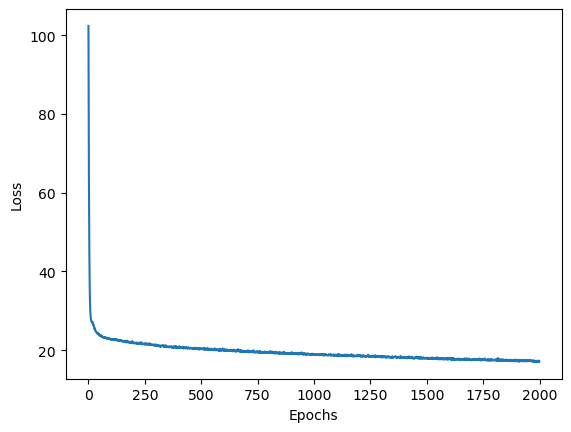

In [66]:
plt.plot(range(num_epochs), epoch_loss) 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

x축에 학습 에폭, y축에 각 에폭별 누적 손실값 그리기.

In [68]:
predictions = []
for i, data in enumerate(X_test):
  y_pred = model(data)
  predictions.append(y_pred.argmax().item())
  if (i <=10):
    print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
1


In [110]:
predictions = [] # 예측 결과(클래스)를 저장할 빈 리스트를 만듦.
for i, data in enumerate(X_test): # 테스트 데이터셋의 각 샘플을 하나씩 반복. i는 인덱스, data는 각 샘플(입력 데이터).
  y_pred = model(data) # 각 샘플을 모델에 넣어 예측 결과(클래스 점수)를 얻는다.
  predictions.append(y_pred.argmax().item())
  if (i <=10):
    print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
1


predictions = [] # 예측 결과(클래스)를 저장할 빈 리스트를 만듦.
for i, data in enumerate(X_test): # 테스트 데이터셋의 각 샘플을 하나씩 반복. i는 인덱스, data는 각 샘플(입력 데이터).
  y_pred = model(data) # 각 샘플을 모델에 넣어 예측 결과(클래스 점수)를 얻는다.
  data는 1차원 텐서이므로, 모델이 배치 입력만 받는 경우 에러가 날 수 있다.
  일반적으로 data.unsqueeze(0)으로 차원을 늘려 (1,특성수)형태로 넣는다.
  predictions.append(y_pred.argmax().item()) # 예측 결과 중 가장 값이 큰 인덱스(=예측 클래스, 0 또는 1)를 추출해 리스트에 저장.
  if (i <=10):
    print(y_pred.argmax().item()) # 처음 11개 샘플의 예측 클래스 출력

In [70]:
from sklearn.metrics import confusion_matrix
# confusion matrix
confusion_matrix = confusion_matrix(y_test.cpu().numpy(), predictions)
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP)
sensitivity=TP/(TP+FN)
specificity=TN/(FP+TN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print ("Confusion Matrix : \n", confusion_matrix)
print ("Precision : ", round(precision,4))
print ("Sensitivity : ", round(sensitivity,4))
print ("Specificity : ", round(specificity,4))
print ("Accuracy : ", round(accuracy,4))

Confusion Matrix : 
 [[88 19]
 [17 30]]
Precision :  0.6122
Sensitivity :  0.6383
Specificity :  0.8224
Accuracy :  0.7662


from sklearn.metrics import confusion_matrix
# confusion matrix
confusion_matrix = confusion_matrix(y_test.cpu().numpy(), predictions)
# 실제 정답(y_test)과 예측 결과(predictions)를 비교하여 혼동행렬을 만듦.
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP) # 모델이 양성이라고 예측한 것 중 실제 양성의 비율
sensitivity=TP/(TP+FN) # 실제 양성 중에서 모델이 양성으로 잘 맞춘 비율
specificity=TN/(FP+TN) #  실제 음성 중에서 모델이 음성으로 잘 맞춘 비율
accuracy=(TP+TN)/(TP+TN+FP+FN) # 전체 데이터 중에서 맞춘 비율
print ("Confusion Matrix : \n", confusion_matrix)
print ("Precision : ", round(precision,4))
print ("Sensitivity : ", round(sensitivity,4))
print ("Specificity : ", round(specificity,4))
print ("Accuracy : ", round(accuracy,4))
각 지표를 소수점 4자리까지 출력.

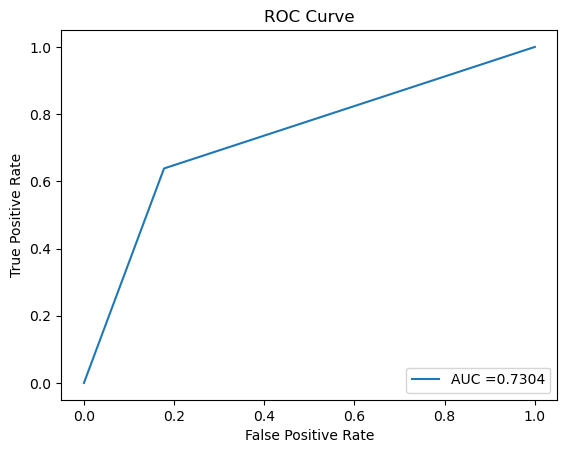

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test.cpu().numpy(),  predictions)
auc = roc_auc_score(y_test.cpu().numpy(), predictions)
auc=round(auc,4)
plt.plot(fpr,tpr,label="AUC ="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test.cpu().numpy(),  predictions)

[roc_curve]
roc_curve(y_test.cpu().numpy(), predictions)
실제 정답(y_test)과 예측값(predictions)을 이용해
FPR(위양성률, False Positive Rate)과 TPR(진양성률, True Positive Rate, 민감도)을 계산
FPR: 실제 0을 1로 잘못 예측한 비율
TPR: 실제 1을 1로 잘 맞춘 비율(=민감도, Sensitivity)

auc = roc_auc_score(y_test.cpu().numpy(), predictions)
[roc_auc_score]
roc_auc_score(y_test.cpu().numpy(), predictions)
ROC 커브 아래 면적(AUC, Area Under Curve)을 계산
AUC 값이 1에 가까울수록 분류 성능이 우수함을 의미

auc=round(auc,4)
4자리까지 반올림.

plt.plot(fpr,tpr,label="AUC ="+str(auc))
x축: FPR, y축: TPR로 ROC 커브를 그립니다.

커브의 범례에 AUC 값을 함께 표시합니다.
plt.legend(loc=4) # 범례를 오른쪽 아래(loc=4)에 표시.
plt.title("ROC Curve") # 그래프 제목을 'ROC Curve'로 지정.
plt.ylabel('True Positive Rate') # y축 라벨을 '진양성률'(민감도)로 지정
plt.xlabel('False Positive Rate') # x축 라벨을 '위양성률'로 지정
plt.show() 그래프 출력.